In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [28]:
url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
data = pd.read_csv(url)

In [29]:
data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [30]:
X = data.drop(columns='logS')
y = data['logS']

In [31]:
# Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(915, 4) (229, 4) (915,) (229,)


In [33]:
# Model Training

models = [
    ('linear_regression', LinearRegression()),
    ('ridge', Ridge(alpha=1.0)),
    ('lasso', Lasso(alpha=0.1)),
    ('decision_tree',DecisionTreeRegressor(random_state=42)),  
    ('random_forest', RandomForestRegressor(n_estimators=100))
]

trained_models = {}

In [34]:
for model_name,model in models:
    model.fit(X_train,y_train)   # Model Fitting
    y_pred = model.predict(X_test) # Predictions
    mse = mean_squared_error(y_test,y_pred)
    print(mse)

    trained_models[model_name] = mse

    

0.99908444070753
0.9987515245736864
0.9978132916562629
1.0457673816411934
0.4744346944230263


In [35]:
trained_models

{'linear_regression': 0.99908444070753,
 'ridge': 0.9987515245736864,
 'lasso': 0.9978132916562629,
 'decision_tree': 1.0457673816411934,
 'random_forest': 0.4744346944230263}

In [36]:
model_final = RandomForestRegressor(n_estimators=100)
model_final.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
y_pred2 = model_final.predict(X_test)
y_pred2

array([-0.809225  , -6.03568167, -4.81467   , -3.35393   , -0.90155   ,
       -5.33801   , -1.18277667, -4.37133333, -3.94726   , -2.85526667,
       -1.77238   , -1.15755315, -3.88725667, -2.35918405, -3.41729   ,
       -2.60694   , -3.1178    , -4.55537   , -0.912625  , -1.94550667,
       -4.04240667, -1.76676429, -4.62463789, -2.46389667,  0.90047333,
       -0.28382   , -2.8375056 , -5.53268611, -3.80584   , -4.31889   ,
       -2.38123667, -2.73066667, -4.65355   , -1.67244   , -1.82908667,
       -8.20486167, -0.426925  , -1.41518905, -1.8616    , -2.0604    ,
       -1.67244   , -6.96683944, -2.00032   , -0.79481667, -2.3855    ,
       -2.85526667, -4.15907   , -1.52482214,  0.24706667, -1.16666667,
       -3.481815  , -1.94369167, -2.04855   , -2.46861333, -6.96049222,
       -5.4951781 , -3.9301    , -3.21713   , -0.18108262, -2.30326   ,
       -4.224975  , -4.709105  ,  0.07181833, -0.70873238, -2.62727833,
       -1.70136   , -1.79295   , -7.44695   , -2.12959   , -2.27

Text(0.5, 0, 'Experimental LogS')

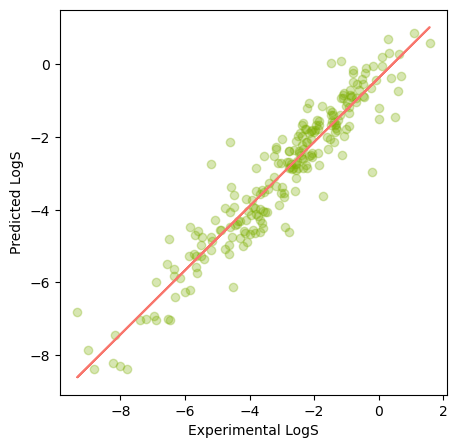

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

In [39]:
joblib.dump(model,'solubility_model.pkl')


['solubility_model.pkl']

In [40]:
model_loaded = joblib.load('solubility_model.pkl')

In [41]:
input_data = np.array([2.5,150.34,1.0,0.0]).reshape(1,-1)
pred = model_loaded.predict(input_data)
pred

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([-2.18866667])

In [42]:
import sklearn
print(sklearn.__version__)


1.2.2


In [43]:
pcp.get_compounds('C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1', 'smiles')

NameError: name 'pcp' is not defined

In [ ]:
'''
smiles = 'CC(=O)OC1=CC=CC=C1C(=O)O'
compound = pcp.get_substances(smiles, "smiles")
st.write(compound)

cs = pcp.get_compounds('C20H41Br', 'formula')
df4 = pcp.compounds_to_frame(cs, properties=['isomeric_smiles', 'xlogp', 'rotatable_bond_count'])
st.table(df4)
'''